# TO DO

0) Determine which "easy data" to add (conferences, rank, etc)
1) How to include specific match data
2) Try RandomForests
3) Add more evaluations
4) Predict over/under instead/also?
5) Research how to make dimensionality reduction work and still be able to get a prediction
6) Move desired current prediction to the top of the sheet
7) Add post season agg data
8) Verify the results are being interpreted correctly

Current Parameters:

In [1]:
# Number of Neurons
neurons_1 = 27
neurons_2 = 10
neurons_3 = 10
neurons_4 = 5

# Activation Types
activation_1 = "relu" # Original: "relu"
activation_2 = "sigmoid"
activation_3 = "sigmoid"
activation_4 = "sigmoid"
activation_outer = "sigmoid"

#Number of Epochs
num_epochs = 20 # Original: 50

# Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from sklearn import preprocessing
import pandas as pd
import tensorflow as tf
import keras
import os

#  Import and read the charity_data.csv
import pandas as pd
# application_df = pd.read_csv("Resources/charity_data.csv")
# application_df.head()

### Extracting CSVs

In [3]:
parse_dates = ["GAME DATE"]
nba_df = pd.DataFrame(pd.read_csv("Data/Sample_NBA_Data_Reg_Season_2022.csv", parse_dates=parse_dates))

nba_teams_df = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_adv_stats.csv"))
nba_def_df = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_def.csv"))
nba_off_df = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_off.csv"))
nba_post_adv_stats_df = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_post_adv_stats.csv"))
nba_post_def_df = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_post_def.csv"))
nba_post_off_df = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_post_off.csv"))

reg_season_compiled = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_reg_compiled_stats.csv").drop(['Unnamed: 0'],axis=1))
post_season_compiled = pd.DataFrame(pd.read_csv("nba_team_stats_data/nba_post_compiled_stats.csv").drop(['Unnamed: 0'],axis=1))

In [4]:
post_season_compiled
# nba_df.head(50)

,Team,MP,Off_FG,Off_FGA,Off_FG%,Off_3P,Off_3PA,Off_3P%,Off_2P,Off_2PA,...,3PAr,TS%,Off_eFG%,Off_TOV%,Off_ORB%,Off_FT/FGA,Def_eFG%,Def_TOV%,Def_DRB%,Def_FT/FGA
0,Golden State Warriors,240.0,42.1,85.9,0.490,13.8,36.2,0.382,28.3,49.7,...,0.421,0.599,0.571,13.4,24.2,0.187,0.529,11.6,77.8,0.211
1,Memphis Grizzlies,240.0,39.8,91.3,0.435,13.1,35.8,0.365,26.7,55.5,...,0.392,0.545,0.507,11.9,25.8,0.218,0.530,15.6,77.7,0.211
2,Denver Nuggets,240.0,39.4,82.8,0.476,11.2,31.4,0.357,28.2,51.4,...,0.379,0.586,0.543,14.9,28.0,0.242,0.608,12.2,81.4,0.230
3,New Orleans Pelicans,240.0,39.0,84.3,0.462,9.3,26.3,0.354,29.7,58.0,...,0.312,0.566,0.518,13.0,35.0,0.267,0.575,10.7,80.3,0.193
4,Minnesota Timberwolves,240.0,36.3,82.0,0.443,13.8,35.7,0.388,22.5,46.3,...,0.435,0.579,0.527,15.8,17.1,0.276,0.519,13.6,72.5,0.268
5,Brooklyn Nets,240.0,39.3,78.0,0.503,11.5,27.3,0.422,27.8,50.8,...,0.349,0.610,0.577,14.6,23.0,0.244,0.562,12.9,69.9,0.223
6,Boston Celtics,240.0,37.3,81.7,0.457,13.8,37.3,0.371,23.5,44.4,...,0.457,0.584,0.541,13.1,21.4,0.236,0.493,12.1,76.5,0.193
7,Phoenix Suns,240.0,41.2,82.8,0.497,9.8,27.2,0.363,31.3,55.6,...,0.328,0.591,0.557,12.7,24.2,0.187,0.539,12.2,73.8,0.237
8,Dallas Mavericks,240.0,36.3,80.8,0.449,15.8,41.5,0.380,20.5,39.3,...,0.513,0.584,0.546,10.1,15.7,0.223,0.539,12.8,74.7,0.214
9,Philadelphia 76ers,242.1,36.4,78.3,0.465,12.4,33.3,0.373,24.0,44.9,...,0.426,0.592,0.545,14.3,20.4,0.246,0.512,11.0,75.8,0.207


### Creating Team Name - Abbreviation Dataframe

In [5]:
team_names_series = reg_season_compiled["Team"]

team_abbv = ["MIN", "MEM", "MIL", "CHA", "PHX", "ATL", "UTA", "SAS", "BKN", "DEN", "LAL", "BOS", "CHI", "IND", "GSW", "SAC", "MIA", "PHI", "HOU", "TOR", "NOP", "WAS", "LAC", "DAL", "CLE", "NYK", "POR", "DET", "ORL", "OKC"]
team_abbv_series = pd.Series(team_abbv)

frame = { 'Team': team_names_series, 'ABBV': team_abbv_series }

name_abbv = pd.DataFrame(frame)

name_abbv

,Team,ABBV
0,Minnesota Timberwolves,MIN
1,Memphis Grizzlies,MEM
2,Milwaukee Bucks,MIL
3,Charlotte Hornets,CHA
4,Phoenix Suns,PHX
5,Atlanta Hawks,ATL
6,Utah Jazz,UTA
7,San Antonio Spurs,SAS
8,Brooklyn Nets,BKN
9,Denver Nuggets,DEN


### Combine DataFrames

In [6]:
# Merge Agg Data with Abbv to create a dataframe with the aggregate data and the team abbreviation

reg_season_abbv = reg_season_compiled.merge(name_abbv, how = "left", on = "Team")
reg_season_abbv

,Team,MP,Off_FG,Off_FGA,Off_FG%,Off_3P,Off_3PA,Off_3P%,Off_2P,Off_2PA,...,Off_eFG%,Off_TOV%,Off_ORB%,Off_FT/FGA,Def_eFG%,Def_TOV%,Def_DRB%,Def_FT/FGA,Attend./G,ABBV
0,Minnesota Timberwolves,241.2,41.6,91.0,0.457,14.8,41.3,0.358,26.8,49.7,...,0.539,12.4,24.4,0.198,0.535,14.2,74.9,0.227,16028,MIN
1,Memphis Grizzlies,241.2,43.5,94.4,0.461,11.5,32.7,0.353,32.0,61.7,...,0.522,11.2,30.0,0.180,0.523,13.3,77.8,0.195,15775,MEM
2,Milwaukee Bucks,240.9,41.8,89.4,0.468,14.1,38.4,0.366,27.8,51.0,...,0.546,11.9,23.0,0.199,0.536,11.6,78.6,0.165,17453,MIL
3,Charlotte Hornets,242.4,42.8,91.4,0.468,13.9,38.2,0.365,28.8,53.3,...,0.544,11.6,23.3,0.173,0.544,13.1,74.8,0.187,17092,CHA
4,Phoenix Suns,240.6,43.7,90.1,0.485,11.6,31.9,0.364,32.1,58.2,...,0.549,11.6,22.3,0.176,0.510,13.0,77.1,0.195,16175,PHX
5,Atlanta Hawks,240.3,41.5,88.3,0.470,12.9,34.4,0.374,28.6,53.9,...,0.543,10.8,23.0,0.205,0.543,11.5,76.9,0.177,16408,ATL
6,Utah Jazz,240.6,40.6,86.2,0.471,14.5,40.3,0.360,26.0,45.8,...,0.555,12.7,25.4,0.208,0.521,10.9,78.3,0.164,18306,UTA
7,San Antonio Spurs,241.5,43.2,92.7,0.467,11.3,32.0,0.352,32.0,60.7,...,0.527,11.1,23.7,0.166,0.532,12.1,75.1,0.176,15014,SAS
8,Brooklyn Nets,240.9,42.0,88.4,0.475,11.5,31.7,0.361,30.5,56.7,...,0.540,12.5,23.9,0.198,0.521,11.7,75.1,0.201,17355,BKN
9,Denver Nuggets,241.5,41.7,86.3,0.483,12.7,35.9,0.353,29.0,50.4,...,0.556,13.2,21.9,0.194,0.537,11.7,78.3,0.188,16958,DEN


In [7]:
# Run this cell to check dtypes

# for i in range(0, len(reg_season_abbv.columns)):
#     print(f"{reg_season_abbv.columns[i]}: {reg_season_abbv.dtypes[i]}")

In [8]:
# Create "matches" for the usuable match up data
matches = nba_df[["TEAM", "MATCH UP", "W/L"]].copy()

# Split the "MATCH UP" Column into 3 separate columns
matches[["TEAM", "TYPE", "OPPONENT"]] = matches['MATCH UP'].apply(lambda x: pd.Series(x.split(' ')))

# Drop the original "MATCH UP" column
matches = matches.drop(["MATCH UP"], axis = 1)
matches

,TEAM,W/L,TYPE,OPPONENT
0,MIN,L,vs.,CHI
1,CHI,W,@,MIN
2,PHI,W,vs.,DET
3,DET,L,@,PHI
4,MEM,L,vs.,BOS
...,...,...,...,...
245,SAC,W,@,ORL
246,MIA,L,vs.,BKN
247,BKN,W,@,MIA
248,SAS,W,@,NOP


In [9]:
# Distinguish Opponent Data from "Defending" Team Data   - Is "defending" the right term?
oppo_reg_season_abbv = reg_season_abbv.add_prefix('OPPO_')

In [10]:
# Merge Team Agg Info with Match Info, twice... Once for defending team, once for opponent
team_games_data = matches.merge(reg_season_abbv, how = "left", left_on = "TEAM", right_on = "ABBV").merge(oppo_reg_season_abbv, how = "left", left_on = "OPPONENT", right_on = "OPPO_ABBV")

# Drop target and superfluous columns
team_games_data = team_games_data.drop(['W/L', "Team", "OPPO_Team", "ABBV", "OPPO_ABBV"], axis = 1)

# Dummies, Scaling, Splitting Data

I wasn't able to filter y out the same way as the homework, but this seems to work.  Note: I tried the hw method before dropping W/L above this line

In [11]:
# Designate the target values as the winning side of W/L
y = pd.get_dummies(matches['W/L'])
y = y["W"]

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
team_games_data_dummies = pd.get_dummies(team_games_data)
team_games_data_dummies.shape
team_games_data_dummies

,MP,Off_FG,Off_FGA,Off_FG%,Off_3P,Off_3PA,Off_3P%,Off_2P,Off_2PA,Off_2P%,...,OPPONENT_OKC,OPPONENT_ORL,OPPONENT_PHI,OPPONENT_PHX,OPPONENT_POR,OPPONENT_SAC,OPPONENT_SAS,OPPONENT_TOR,OPPONENT_UTA,OPPONENT_WAS
0,241.2,41.6,91.0,0.457,14.8,41.3,0.358,26.8,49.7,0.540,...,0,0,0,0,0,0,0,0,0,0
1,240.6,41.7,86.9,0.480,10.6,28.8,0.369,31.1,58.1,0.535,...,0,0,0,0,0,0,0,0,0,0
2,241.5,39.4,84.5,0.466,11.6,31.8,0.364,27.8,52.7,0.527,...,0,0,0,0,0,0,0,0,0,0
3,241.2,38.2,88.6,0.431,11.3,34.6,0.326,26.9,54.0,0.498,...,0,0,1,0,0,0,0,0,0,0
4,241.2,43.5,94.4,0.461,11.5,32.7,0.353,32.0,61.7,0.519,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,241.5,40.5,88.1,0.460,11.4,33.2,0.344,29.1,54.9,0.530,...,0,1,0,0,0,0,0,0,0,0
246,242.1,39.6,84.8,0.467,13.6,35.8,0.379,26.0,49.0,0.531,...,0,0,0,0,0,0,0,0,0,0
247,240.9,42.0,88.4,0.475,11.5,31.7,0.361,30.5,56.7,0.538,...,0,0,0,0,0,0,0,0,0,0
248,241.5,43.2,92.7,0.467,11.3,32.0,0.352,32.0,60.7,0.527,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Run this cell to check dtypes

# for i in range(0, len(team_games_data_dummies.columns)):
#     print(f"{team_games_data_dummies.columns[i]}: {team_games_data_dummies.dtypes[i]}")

In [14]:
# Split our preprocessed data into our features and target arrays
X = team_games_data_dummies
# y = team_games_dummies['W/L']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train, and Evaluate the Neural Network Models

In [28]:
# Find Best Model from previous runs - This code finds the first model with the highest accuracy in the list, not all models with the same (shared) highest accuracy

def get_best_saved_model():

    folder_list = os.listdir('Models/OLD_Reg_Season')
    model_list = []
    accu_list = []  
    
    # Compile a list of models
    for file in folder_list:
        first_word = file.split("_")[0]
        if first_word == "NBA":
            model_list.append(file)

    # Exract the accuracy of the models
    for model in model_list:
        model_name = model.split(".")[0]
        model_accu = model_name[-4:]
        accu_list.append(model_accu)

    # Find the index of the best accuracy
    best_saved_accuracy = max(accu_list)
    index = accu_list.index(best_saved_accuracy)
    
    # Get the name of the best saved model
    best_saved_model = model_list[index]
        
    return int(best_saved_accuracy), best_saved_model

In [29]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_features = len(X_train_scaled[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = neurons_1, activation = activation_1, input_dim = num_features))

# Second hidden layer ("If Necessary")
nn.add(tf.keras.layers.Dense(units = neurons_2, activation = activation_2))

# Third hidden layer ("If Necessary")
nn.add(tf.keras.layers.Dense(units = neurons_3, activation = activation_3))

# Third hidden layer ("If Necessary")
nn.add(tf.keras.layers.Dense(units = neurons_4, activation = activation_4))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation = activation_outer))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 27)                5319      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                280       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 5,770
Trainable params: 5,770
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=num_epochs)

Epoch 1/20
6/6 [==============================] - 0s 665us/step - loss: 0.7023 - accuracy: 0.5080
Epoch 2/20
6/6 [==============================] - 0s 499us/step - loss: 0.6974 - accuracy: 0.5080
Epoch 3/20
6/6 [==============================] - 0s 498us/step - loss: 0.6942 - accuracy: 0.5080
Epoch 4/20
6/6 [==============================] - 0s 499us/step - loss: 0.6917 - accuracy: 0.5080
Epoch 5/20
6/6 [==============================] - 0s 499us/step - loss: 0.6889 - accuracy: 0.5080
Epoch 6/20
6/6 [==============================] - 0s 332us/step - loss: 0.6865 - accuracy: 0.5080
Epoch 7/20
6/6 [==============================] - 0s 498us/step - loss: 0.6843 - accuracy: 0.5080
Epoch 8/20
6/6 [==============================] - 0s 499us/step - loss: 0.6822 - accuracy: 0.5080
Epoch 9/20
6/6 [==============================] - 0s 499us/step - loss: 0.6800 - accuracy: 0.5080
Epoch 10/20
6/6 [==============================] - 0s 499us/step - loss: 0.6773 - accuracy: 0.5241
Epoch 11/20
6/6 [==

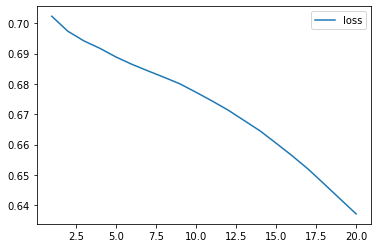

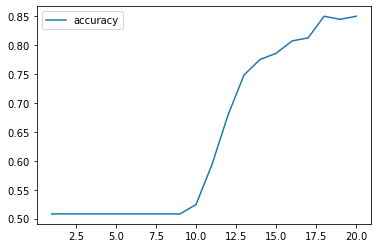

In [32]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
history_df.plot(y="accuracy");

In [33]:
# Evaluate the model using the test data
current_model_loss, current_model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Loss: {current_model_loss}, Accuracy: {current_model_accuracy}")

Loss: 0.6687770485877991, Accuracy: 0.6666666865348816


In [60]:
# Define best_saved_accuracy so that only models with better accuracy are saved
best_saved_accuracy, best_saved_model = get_best_saved_model()
best_saved_accuracy, best_saved_model

# Save and export results to an HDF5 file
if current_model_accuracy > best_saved_accuracy:
    accu = round(current_model_accuracy * 10_000)
    nn.save(f"Models/OLD_Reg_Season/NBA_model_basic{accu}.h5")
    print(f"Model saved with {accu} accuracy")

# GAME PREDICTION

In [61]:
# Boston Celtics BOS @ Golden State Warriors GSW

# Test predictions on PHX vs. HOU

team_A = "HOU" #TEAM
game_type = "@" #TYPE
team_B = "PHX" #OPPONENT

d = {"TEAM": team_A, "TYPE": game_type, "OPPONENT": team_B}

current_match = pd.DataFrame(data = d, index=[0])
current_match

,TEAM,TYPE,OPPONENT
0,HOU,@,PHX


### Create dataframe that matches the columns from "X_train"

In [62]:
# Merge aggregate info into the match data frame
current_game_data = current_match.merge(reg_season_abbv, how = "left", left_on = "TEAM", right_on = "ABBV").merge(oppo_reg_season_abbv, how = "left", left_on = "OPPONENT", right_on = "OPPO_ABBV")
current_game_data = pd.get_dummies(current_game_data.drop(["Team", "OPPO_Team", "ABBV", "OPPO_ABBV"], axis = 1))

# Add missing columns and assign a value of "0" for each
fill_list = list(set(team_games_data_dummies.columns) - set(current_game_data.columns))

for i in fill_list:
    current_game_data[i] = 0

# Make the column orders match
columns = list(X_train.columns)
current_game_data = current_game_data[columns].copy()

In [63]:
# Confirm a lack of differences
print(list(set(current_game_data.columns) - set(X_train.columns)))
print(list(set(X_train.columns) - set(current_game_data.columns)))

# Confirm columns are in the same order
for i in range(0, len(X_train.columns) - 1):
    if current_game_data.columns[i] != X_train.columns[i]:
        print(f"column {i} does not match")

[]
[]


In [64]:
# Use dataframe of current match data to generate prediction - https://machinelearningmastery.com/make-predictions-scikit-learn/
X_new = X_scaler.transform(current_game_data)
y_new = nn.predict([X_new])

win_chance = "{:.2%}".format(y_new[0][0])
model_accuracy_perc = "{:.2%}".format(current_model_accuracy)
print(f"{team_A} has a {win_chance} chance to win {game_type} {team_B} according to the current model ({model_accuracy_perc} accuracy).")

HOU has a 45.65% chance to win @ PHX according to the current model (66.67% accuracy).


## Compare to Best Saved Model

In [65]:
# Load the model
saved_model = load_model(f"Models/OLD_Reg_Season/{best_saved_model}")

# Evaluate the model using the test data
saved_model_loss, saved_model_accuracy = saved_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Loss: {saved_model_loss}, Accuracy: {saved_model_accuracy}")

Loss: 0.5752036571502686, Accuracy: 0.7777777910232544


In [66]:
y_new = saved_model.predict([X_new])

win_chance = "{:.2%}".format(y_new[0][0])
model_accuracy_perc = "{:.2%}".format(saved_model_accuracy)

print(f"{team_A} has a {win_chance} chance to win {game_type} {team_B} according to the best saved model ({model_accuracy_perc} accuracy).")

HOU has a 22.95% chance to win @ PHX according to the best saved model (77.78% accuracy).


# Automated Optimization
The auto-optimizer will not create new models unless "untitled_project" is deleted first

In [44]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=2), activation=activation, input_dim=num_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [45]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=2)

In [46]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled, y_train, epochs = 20, validation_data=(X_test_scaled,y_test))

Trial 180 Complete [00h 00m 01s]
val_accuracy: 0.682539701461792

Best val_accuracy So Far: 0.7777777910232544
Total elapsed time: 00h 02m 24s
INFO:tensorflow:Oracle triggered exit


In [47]:
X_train_scaled.shape, X_test_scaled.shape

((187, 196), (63, 196))

In [48]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters()[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 7,
 'num_layers': 2,
 'units_0': 5,
 'units_1': 17,
 'units_2': 15,
 'units_3': 25,
 'units_4': 23,
 'units_5': 29,
 'tuner/epochs': 17,
 'tuner/initial_epoch': 6,
 'tuner/bracket': 3,
 'tuner/round': 2,
 'tuner/trial_id': '0040'}

In [49]:
def get_best_model(nn, parameters, X_train_scaled, y_train):
    clf = GridSearchCV(model, parameters, cv=4, n_jobs=-1)
    clf.fit(X_train, y_train)
    # print(clf.best_params_)
    return clf.best_estimator_ 

In [50]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

In [51]:
# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# param_grid = dict(activation=activation)


# param_grid = dict(epochs=[10, 20, 30])
# grid = GridSearchCV(estimator=model, param_grid = param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)

In [52]:
# best_model = tuner.get_best_models()[0]
# best_model

The following cell will start to break if you run it too many times before restarting the kernal

In [59]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
auto_model_loss, auto_model_accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {auto_model_loss}, Accuracy: {auto_model_accuracy}")

accu = round(auto_model_accuracy * 10_000)
best_model.save(f"Models/OLD_Reg_Season/NBA_model_auto{accu}.h5")


2/2 - 0s - loss: 0.5752 - accuracy: 0.7778
Loss: 0.5752036571502686, Accuracy: 0.7777777910232544


In [67]:
# Define best_saved_accuracy so that only models with better accuracy are saved
best_saved_accuracy, best_saved_model = get_best_saved_model()
best_saved_accuracy, best_saved_model

# Save and export results to an HDF5 file
if auto_model_accuracy > best_saved_accuracy:
    accu = round(auto_model_accuracy * 10_000)
    best_model.save(f"Models/OLD_Reg_Season/NBA_model_auto{accu}.h5")
    print(f"Model saved with {accu} accuracy")

## Auto-Optimizer Prediction

In [68]:
y_auto_model = best_model.predict([X_new])

win_chance = "{:.2%}".format(y_auto_model[0][0])
model_accuracy_perc = "{:.2%}".format(auto_model_accuracy)

print(f"{team_A} has a {win_chance} chance to win {game_type} {team_B} according to the best auto-optimized model ({model_accuracy_perc} accuracy).")

HOU has a 22.95% chance to win @ PHX according to the best auto-optimized model (77.78% accuracy).


# RandomForestsClassifier

In [69]:
rfc = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {rfc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rfc.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.5714285714285714


In [71]:
flatten=[]
for x in range(X_new[0].size):
    flatten.append(X_new[0][x])
#print(test)
y_rfc = rfc.predict([flatten])
y_rfc

array([0], dtype=uint8)

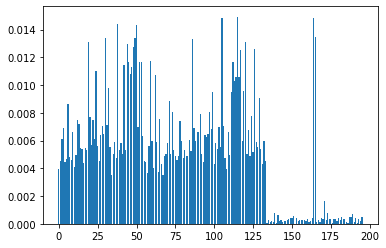

In [72]:
features = rfc.feature_importances_
# print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

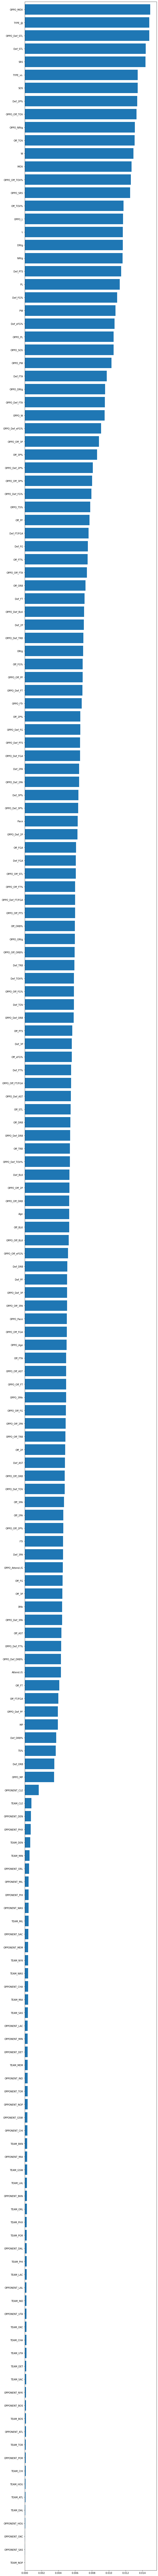

In [73]:
features = sorted(zip(X.columns, rfc.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [74]:
# Attempt Feature Selection

from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(rfc)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False, False,  True,  True, False, False,  True, False, False,
        True, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True, False,  True,
        True, False,  True, False, False, False, False,  True,  True,
       False,  True,  True, False, False, False,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,

In [75]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

scaler = StandardScaler().fit(X_selected_train)

X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\emera\anaconda3\envs\tf2\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [76]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.8021390374331551
Testing Score: 0.5873015873015873


In [77]:
test=[]
for x in range(X_new[0].size):
    test.append(X_new[0][x])
#print(test)
y_rfc = rfc.predict([test])
y_rfc

array([0], dtype=uint8)

In [78]:
y_rfc = rfc.predict([X_new])
y_rfc

ValueError: Found array with dim 3. Estimator expected <= 2.

# OLD HOMEWORK STARTS HERE

In [ ]:
# Create a callback that saves the model's weights every 5 epochs.
saves = 5
mc = keras.callbacks.ModelCheckpoint('Optimized_Weights/weights{epoch:08d}.h5', save_weights_only=True, save_freq=saves, verbose = 0)

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=num_epochs, callbacks=[mc])

In [ ]:
# Load the model
from tensorflow.keras.models import load_model
loan_model = load_model("AlphabetSoupCharity_Optimization.h5")